In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glucosebench.plot import plot_clarke_error_grid, plot_hypo_metric, plot_distribution, plot_rmse

In [3]:
df = pd.read_csv('./samples/01.csv')
pred_glucose = np.array(df['pred'].values.tolist())
gt_glucose = np.array(df['gt'].values.tolist())

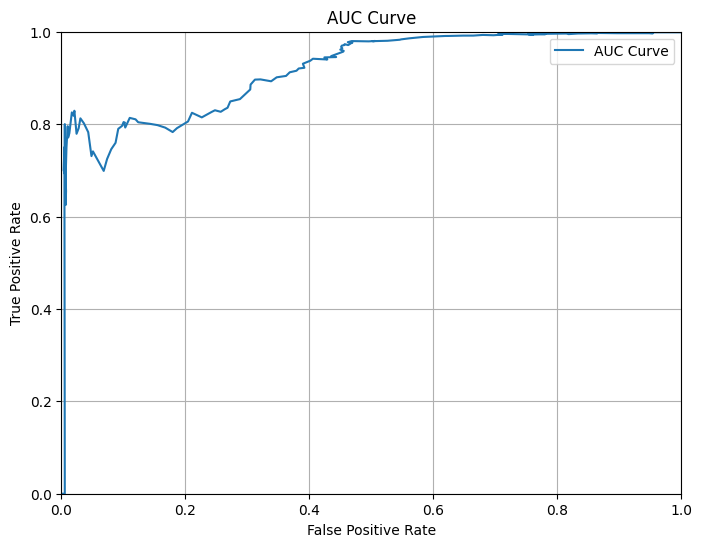

In [44]:
# auc
thresholds = np.linspace(40, 180, 140)
fprs = []
tprs = []
for threshold in thresholds:
    tp = np.sum((pred_glucose < threshold) & (gt_glucose < threshold))
    fp = np.sum((pred_glucose < threshold) & (gt_glucose >= threshold))
    fn = np.sum((pred_glucose >= threshold) & (gt_glucose < threshold))
    tn = np.sum((pred_glucose >= threshold) & (gt_glucose >= threshold))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    tprs.append(tpr)
    fprs.append(fpr)

# plot auc
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label='AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.grid()
plt.legend()
plt.show()

### Clarke Error Grid

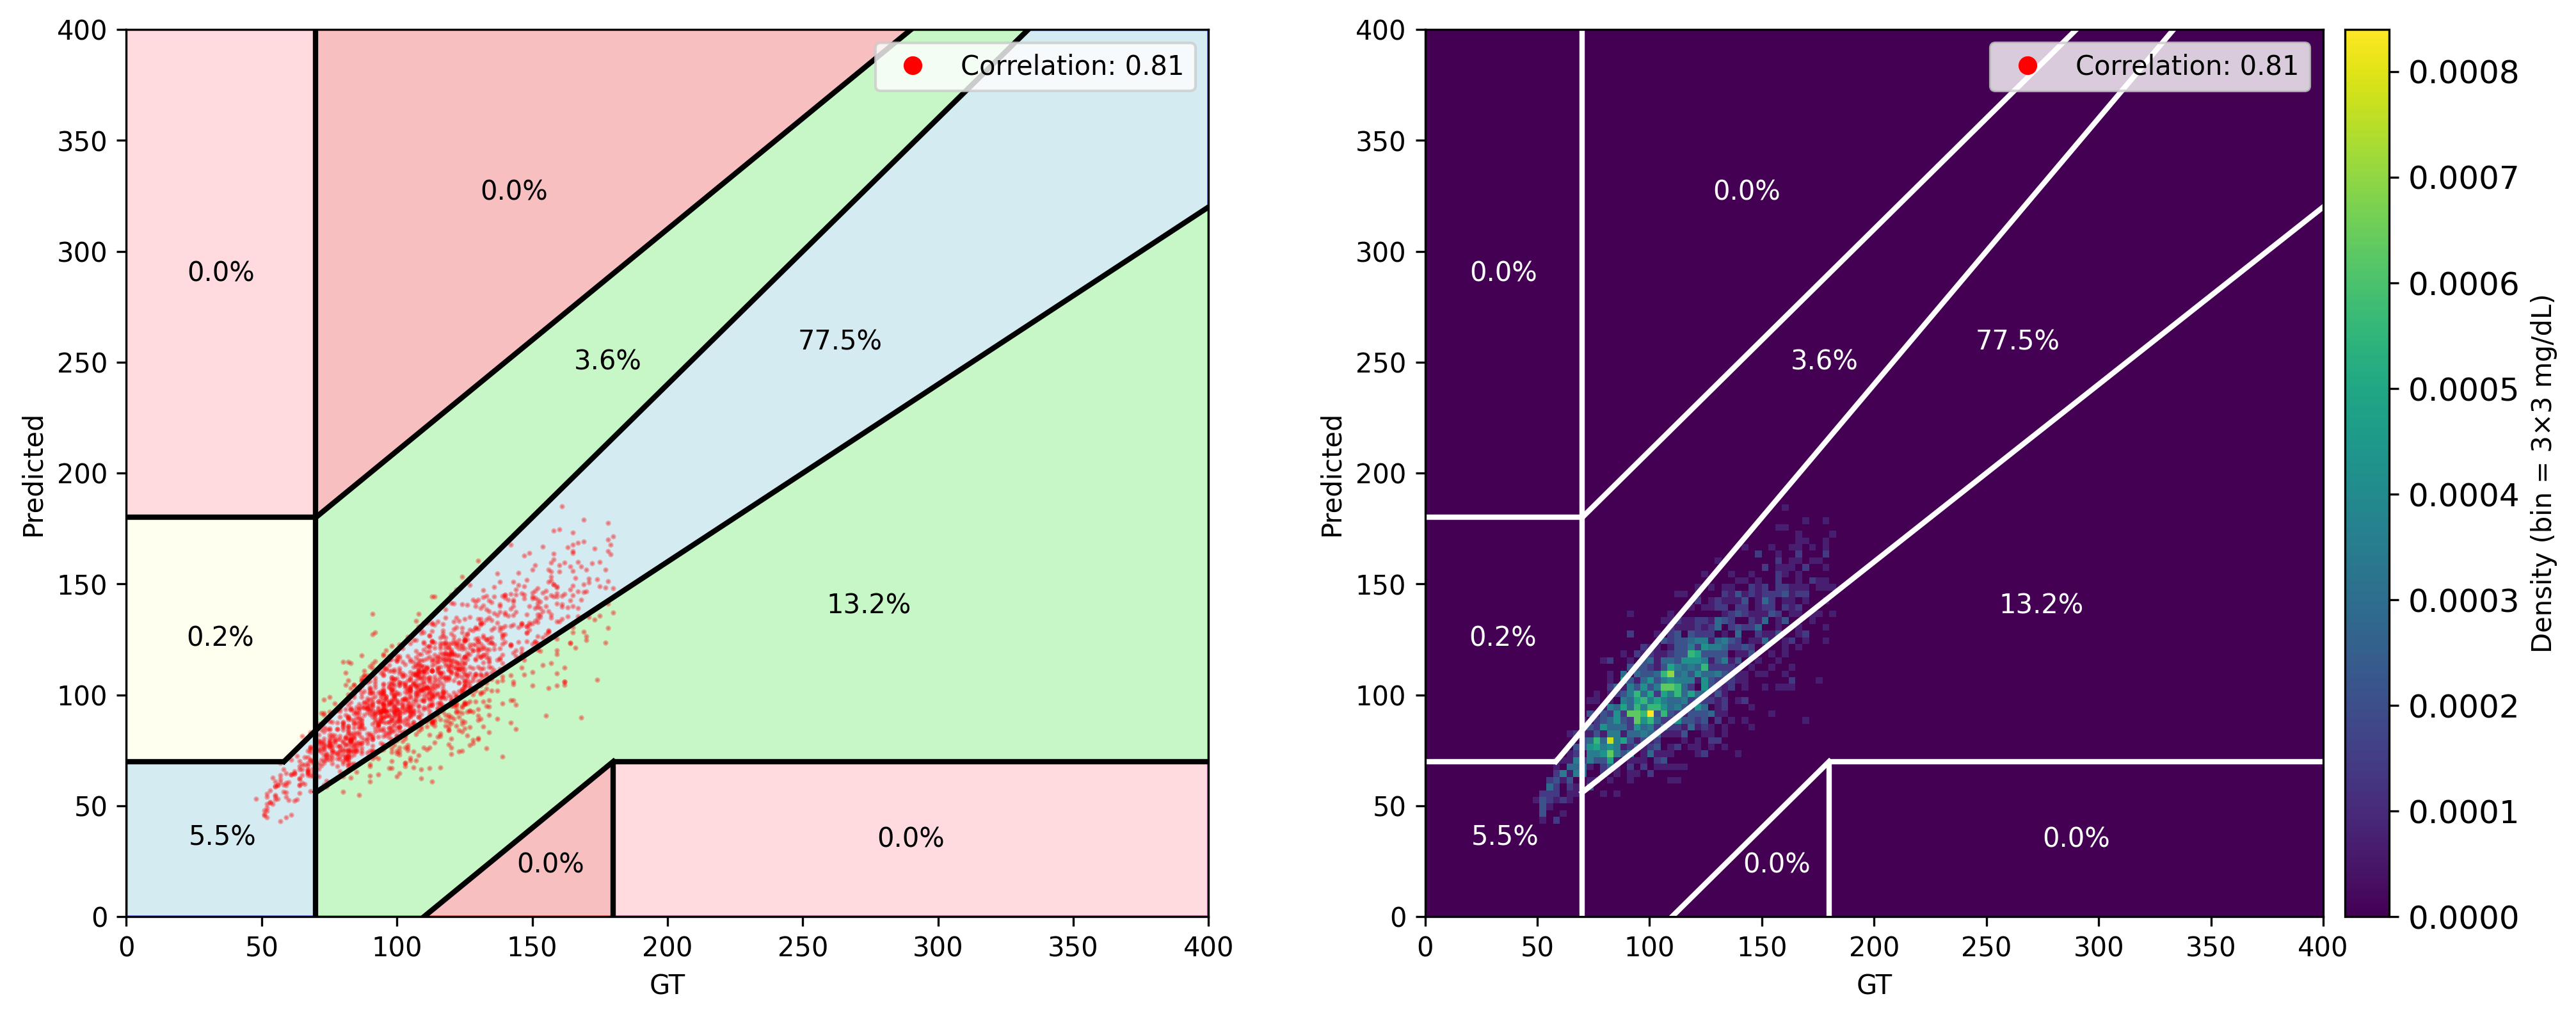

{'zone_a': 0.8306045340050378, 'zone_b': 0.16750629722921914, 'zone_c': 0.0, 'zone_d': 0.001889168765743073, 'zone_e': 0.0, 'out_of_bounds': 0.0, 'corr': 0.8118620575808962}


In [3]:
xmin, xmax = 0, 400
ymin, ymax = 0, 400

fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=300)
clarke_score = plot_clarke_error_grid(ax[0], pred_glucose, gt_glucose, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, style='point')
plot_clarke_error_grid(ax[1], pred_glucose, gt_glucose, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, style='heatmap', bin_size=3)
plt.show()

print(clarke_score)

### Hypoglycemia Metric

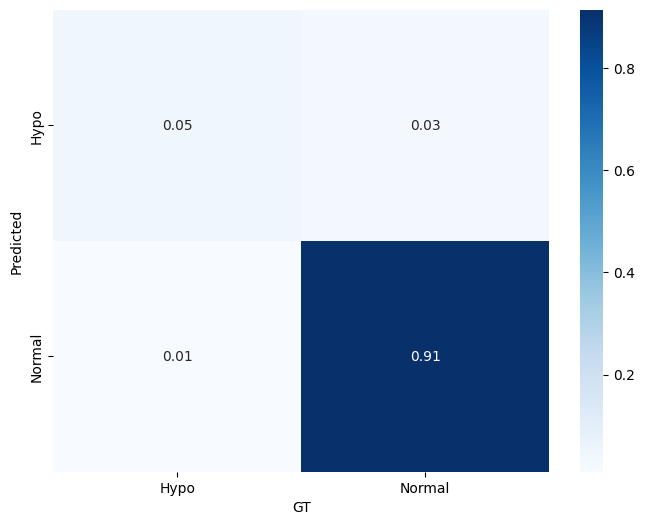

{'accuracy': 0.9609571788413098, 'sensitivity': 0.8241758241758241, 'specificity': 0.9692718770875084}


In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
hypo_score = plot_hypo_metric(ax, pred_glucose, gt_glucose)
plt.show()
print(hypo_score)

### Distribution

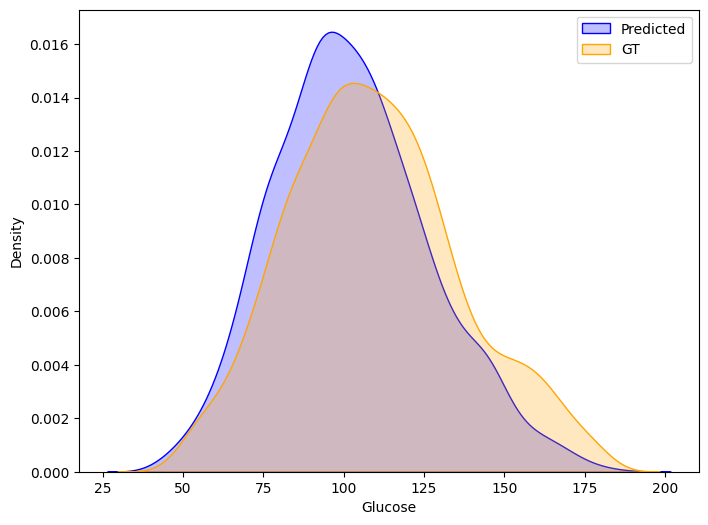

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_distribution(ax, pred_glucose, gt_glucose)
plt.show()

### RMSE

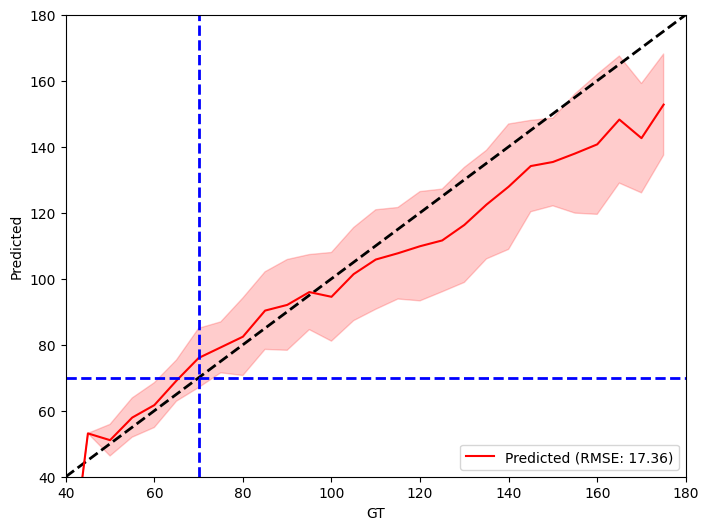

17.358326484891503


In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
rmse = plot_rmse(ax, pred_glucose, gt_glucose, xmin=40, xmax=180, ymin=40, ymax=180)
plt.show()
print(rmse)

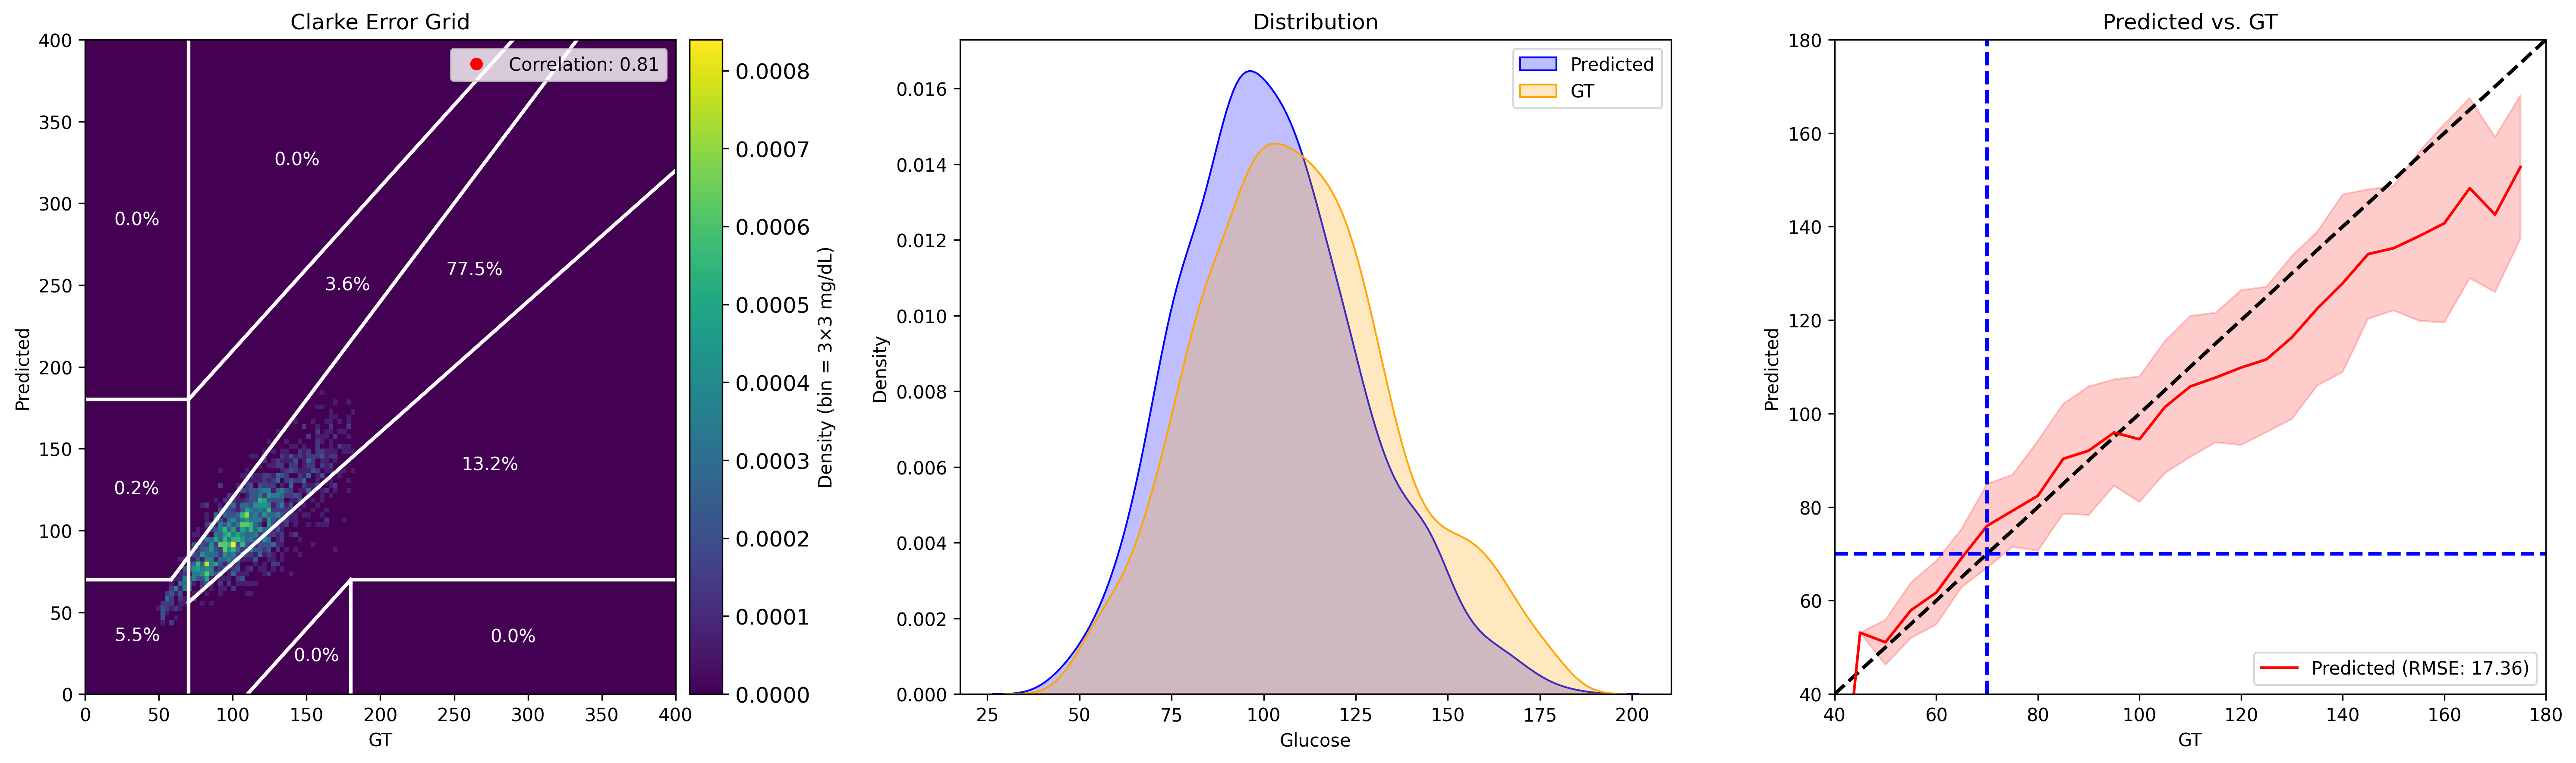

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=300)
plot_clarke_error_grid(ax[0], pred_glucose, gt_glucose, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, style='heatmap', bin_size=3)
ax[0].set_title('Clarke Error Grid')
plot_distribution(ax[1], pred_glucose, gt_glucose, use_kde=True)
ax[1].set_title('Distribution')
plot_rmse(ax[2], pred_glucose, gt_glucose, xmin=40, xmax=180, ymin=40, ymax=180)
ax[2].set_title('Predicted vs. GT')
plt.tight_layout()
plt.show()